In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
warnings.filterwarnings('ignore')

## Wczytanie ramki danych

In [5]:
rain=pd.read_csv("australia.csv")
rain.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


## Stworzenie zbioru treningowego i testowego


In [23]:
x_train, x_test, y_train, y_test = train_test_split(rain.loc[:,rain.columns!="RainTomorrow"], rain[["RainTomorrow"]], test_size=0.33, random_state=43)

## Stworzenie funkcji sprawdzającej dokładność modelu

In [76]:
def analiza(model,y_hat):
    print(f"Precision_score: {precision_score(y_test, y_hat):.4f}")
    print(f"Accuracy_score: {accuracy_score(y_test, y_hat):.4f}")
    print(f"Recall_score: {recall_score(y_test, y_hat):.4f}")
    print(f"AUC_score: {roc_auc_score(y_test, y_hat):.4f}")
    plot_confusion_matrix(model,x_test,y_test, values_format=".0f")

## Logistic Regresion

Pierwszy model to regresja logistyczna. Wybrane hiperparametry to:
* max_iter - maksymalna liczba iteracji

Precision_score: 0.7299
Accuracy_score: 0.8521
Recall_score: 0.5231
AUC_score: 0.7342


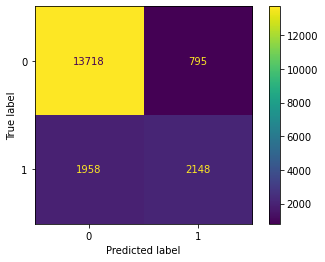

In [96]:
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(x_train,y_train)
y_hat_lr=model_lr.predict(x_test)
analiza(model_lr,y_hat_lr)

## Random Forest Classifier

Drugim modelem jest las losowy. Wybrany hiperparametry to:
* n_estimators - liczba drzew w modelu
* max_depth - maksymalna głebokość pojedyńczego drzewa

Precision_score: 0.7778
Accuracy_score: 0.8471
Recall_score: 0.4296
AUC_score: 0.6974


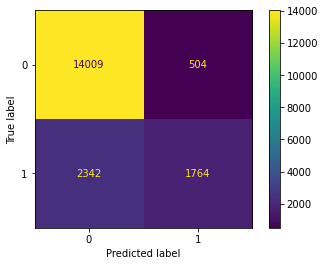

In [94]:
model_rfc=RandomForestClassifier(n_estimators=100,max_depth=5)
model_rfc.fit(x_train,y_train)
y_hat_rfc=model_rfc.predict(x_test)
analiza(model_rfc,y_hat_rfc)

## k_Nearest Neighbors

Ostatnim modelem jest k_Nearest Neighbors. Wybrane hiperparametry to:
* n_neighbors - ilość najbliższych obserwacji branych pod uwage

Precision_score: 0.6921
Accuracy_score: 0.8440
Recall_score: 0.5273
AUC_score: 0.7305


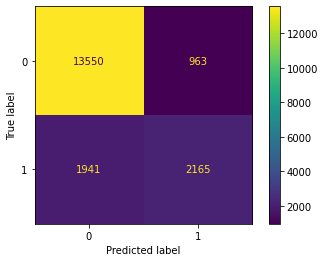

In [95]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
y_hat_knn=model_knn.predict(x_test)
analiza(model_knn,y_hat_knn)

## Krosswalidacja


In [97]:
lr=LogisticRegression(max_iter=1000)
rfc=RandomForestClassifier(max_depth=5, n_estimators=100)
knn=KNeighborsClassifier(n_neighbors=5)



lr_score=cross_val_score(lr,rain.loc[:,rain.columns!="RainTomorrow"], rain[["RainTomorrow"]], cv=10)
rfc_score=cross_val_score(rfc,rain.loc[:,rain.columns!="RainTomorrow"], rain[["RainTomorrow"]],cv=10)
knn_score=cross_val_score(knn,rain.loc[:,rain.columns!="RainTomorrow"], rain[["RainTomorrow"]],cv=10)

print(f"LogisticRegresion score mean: {np.mean(lr_score)}")
print(f"LogisticRegresion score standard_deviation): {np.std(lr_score)}\n")
print(f"RandomForestClassifier score mean: {np.mean(rfc_score)}")
print(f"RandomForestClassifier score standard_deviation): {np.std(rfc_score)}\n")
print(f"k-Nearest Neighbors score mean: {np.mean(knn_score)}")
print(f"k-Nearest Neighbors score standard_deviation): {np.std(knn_score)}")


LogisticRegresion score mean: 0.8496277915632755
LogisticRegresion score standard_deviation): 0.013645616905408378

RandomForestClassifier score mean: 0.8437610776320454
RandomForestClassifier score standard_deviation): 0.009351012345197283

k-Nearest Neighbors score mean: 0.8299361928394186
k-Nearest Neighbors score standard_deviation): 0.017885872111841457


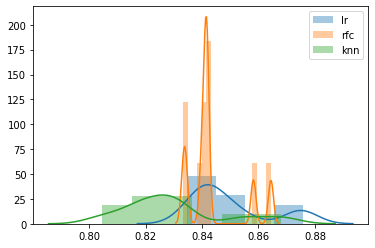

In [98]:
sns.distplot(lr_score, label="lr")
sns.distplot(rfc_score, label="rfc")
sns.distplot(knn_score, label="knn")

plt.legend()
plt.show()

Wybór najlepszego klasyfikatora nie jest prosty, gdyż wszystkie otrzymały bardzo podobne wyniki. W szczególności jeśli chodzi o miare *accuracy*, która wskazuje dla wszystkich klasyfikatorów praktycznie identyczną note. W przypadku *recall* najbardziej odstaje las losowy, natomiast wygrywa jeśli chodzi o miare *precision*. Moim zdaniem jednak najlepszym klasyfikatorem spośród tych trzech jest regresja logistyczna.